In [3]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv
%matplotlib inline

In [25]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")
print(mapbox_token)

pk.eyJ1IjoidmluYXlhbnVwaW5kaSIsImEiOiJja2swMHp0aW0wMWd0Mm9ucDh5b2VyMjg3In0.knJagEcQVVIwO4cckINg8g


In [26]:
# Read the census data into a Pandas DataFrame
file_path = Path("sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


In [27]:
# Calculate the mean number of housing units per year
housing_avg=sfo_data.groupby(by="year")["housing_units"].mean()
housing_avg.head()

year
2010    372560
2011    374507
2012    376454
2013    378401
2014    380348
Name: housing_units, dtype: int64

In [47]:
minimum=housing_avg.min()

In [48]:
maximum=housing_avg.max()

In [49]:
std=housing_avg.std()

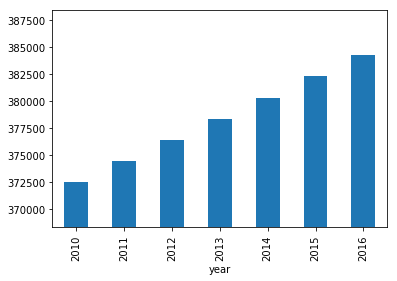

In [50]:
 # Use the Pandas plot function to plot the average housing units per year.
housing_avg.plot.bar(ylim=((minimum-std),(maximum+std)))

In [32]:
# Calculate the average gross rent 
avg_gross_rent=sfo_data.groupby(by="year")["gross_rent"].mean()
avg_gross_rent.head()

year
2010    1239
2011    1530
2012    2324
2013    2971
2014    3528
Name: gross_rent, dtype: int64

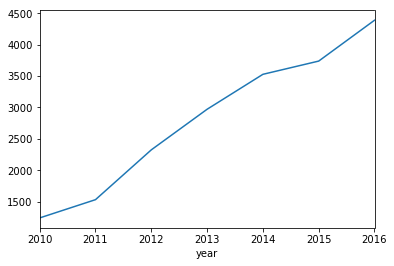

In [33]:
# Plot the Average Gross Rent per Year as a Line Chart 
avg_gross_rent.plot.line()

In [34]:
#Calculate average sales price
avg_sales_price=sfo_data.groupby(by="year")["sale_price_sqr_foot"].mean()
avg_sales_price.head()

year
2010    369.344353
2011    341.903429
2012    399.389968
2013    483.600304
2014    556.277273
Name: sale_price_sqr_foot, dtype: float64

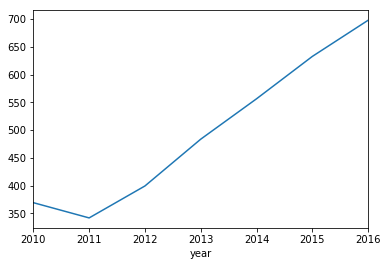

In [35]:
# Plot the Average Sales Price per Year as a line chart
avg_sales_price.plot.line()

In [36]:
neighborhood_price=pd.read_csv(file_path)
neighborhood_price=neighborhood_price.groupby(['neighborhood']).mean()
new_group=pd.read_csv(file_path)

In [37]:
 # Use hplot.line to create line plot
new_group.hvplot.line(x="year", y="sale_price_sqr_foot",groupby='neighborhood')

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [38]:
# Plotting the data from the top 10 expensive neighborhoods
expensive_neighborhood=neighborhood_price.sort_values(by='sale_price_sqr_foot',ascending=False)

In [39]:
expensive_neighborhood.head(10).hvplot.bar(x='neighborhood',y='sale_price_sqr_foot',figsize=(40,40))

:Bars   [neighborhood]   (sale_price_sqr_foot)

In [40]:
# Create Parallel Coordinates plot
px.parallel_coordinates(pd.read_csv(file_path),color="sale_price_sqr_foot")

In [41]:
px.parallel_categories(
    neighborhood_price)

In [42]:
 # Load neighborhoods coordinates data
file_path = Path("neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.rename(columns={'Neighborhood':'neighborhood'}, inplace=True)
df_neighborhood_locations.head()

,neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


In [43]:
avg=sfo_data.groupby(by='neighborhood').mean()


In [44]:
merge=avg.merge(df_neighborhood_locations, how='inner',on='neighborhood')
merge.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Buena Vista Park,452.680591,378076.5,2698.833333,37.768160,-122.439330


In [51]:
map_plot = px.scatter_mapbox(
    merge,
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="neighborhood",
    zoom=4
)

# Display the map
map_plot.show()